# 서울시 구별 CCTV 현황 분석
- 서울시 CCTV 설치현황 데이터
- 서울시 구별 주민등록인구 통계 데이터

In [ ]:
!apt-get install -y fonts-nanum > /dev/null 
!fc-cache -fv > /dev/null 
!rm -rf ~/.cache/matplotlib > /dev/null 

In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['axes.unicode_minus'] = False      # 하이푼 코드가 잘 안되므로 False 해준거임.
plt.rc('font', family='NanumBarunGothic')       # 폰트 고르기

### 1. CCTV 데이터 파악하고 정리하기

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 서울시CCTV설치운영현황(자치구)_년도별_210731기준.csv to 서울시CCTV설치운영현황(자치구)_년도별_210731기준.csv


In [ ]:
# 1.파일 위치 2.불필요한 행 삭제하고 불러오기 3.인코딩 문자

cctv = pd.read_csv(filename, skiprows=1, encoding='euc-kr')
cctv.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,"77,032","7,667","2,200","3,491","4,439","6,582","8,129","9,947","9,876","11,961","11,132","1,608"
1,종로구,"1,772",813,0,0,210,150,1,261,85,9,200,43
2,중 구,"2,333",16,114,87,77,236,240,372,386,155,361,289
3,용산구,"2,383",34,71,234,125,221,298,351,125,307,617,0
4,성동구,"3,602",448,125,212,105,339,310,874,390,262,461,76


In [ ]:
# 어디가 cctv 많고, 증가율은 어떻게 되는지 보기
# 가장 먼저 null data 확인하기.

cctv.isna().sum().sum()

0

In [ ]:
# 1000 단위 구분기호 없애고 정수로 변환하기 : 계산을 위함

for column in cctv.columns[1:]:
    cctv[column] = cctv[column].apply(lambda x: int(x.replace(',',''))) # , -> (공백)
cctv.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,77032,7667,2200,3491,4439,6582,8129,9947,9876,11961,11132,1608
1,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
2,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
3,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
4,성동구,3602,448,125,212,105,339,310,874,390,262,461,76


In [ ]:
# 첫 번째 행 지우기(계)

cctv.drop([0], inplace=True)
cctv.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
1,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
2,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
3,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
4,성동구,3602,448,125,212,105,339,310,874,390,262,461,76
5,광진구,2588,35,57,100,187,98,52,675,465,712,175,32


In [ ]:
# 2021년을 제외한, 최근 3개년의 cctv 증가율 구하기

cctv['2017년_이전'] = cctv.총계 - cctv['2018년'] - cctv['2019년'] - cctv['2020년'] - cctv['2021년']
cctv['최근증가율'] = ((cctv['2018년']+cctv['2019년']+cctv['2020년']) / cctv['2017년_이전'] * 100).round(2)
cctv.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2017년_이전,최근증가율
1,종로구,1772,813,0,0,210,150,1,261,85,9,200,43,1435,20.49
2,중 구,2333,16,114,87,77,236,240,372,386,155,361,289,1142,78.98
3,용산구,2383,34,71,234,125,221,298,351,125,307,617,0,1334,78.64
4,성동구,3602,448,125,212,105,339,310,874,390,262,461,76,2413,46.13
5,광진구,2588,35,57,100,187,98,52,675,465,712,175,32,1204,112.29


In [ ]:
# 구분, 총계, 최근증가율 컬럼만 추출하고 컬럼명을 구별, cctv 댓수로 변경하기

cctv = cctv[['구분', '총계','최근증가율']]
cctv.rename(columns={'구분':'구별', '총계':'CCTV댓수'}, inplace=True)


In [ ]:
cctv.head(3)

,구별,CCTV댓수,최근증가율
1,종로구,1772,20.49
2,중 구,2333,78.98
3,용산구,2383,78.64


In [ ]:
# 구 이름에서 공백 지우기

cctv['구별'] = cctv.구별.str.replace(' ','')
cctv.head()

,구별,CCTV댓수,최근증가율
1,종로구,1772,20.49
2,중구,2333,78.98
3,용산구,2383,78.64
4,성동구,3602,46.13
5,광진구,2588,112.29


### 2. 인구 데이터 정리하기

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 서울시주민등록인구(구별)통계.txt to 서울시주민등록인구(구별)통계.txt


In [ ]:
# 우리가 필요한건 3번쨰 줄이므로 위에 2줄 버리고, 읽는다.

pop = pd.read_csv(filename, sep='\t', skiprows = 2)
pop.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2021.2/4,합계,"4,405,638","9,795,426","4,756,178","5,039,248","9,565,990","4,649,442","4,916,548","229,436","106,736","122,700",2.17,"1,576,971"
1,2021.2/4,종로구,"73,525","155,106","75,009","80,097","146,029","70,985","75,044","9,077","4,024","5,053",1.99,"27,605"
2,2021.2/4,중구,"62,897","132,259","64,526","67,733","123,016","60,019","62,997","9,243","4,507","4,736",1.96,"23,980"
3,2021.2/4,용산구,"111,650","240,665","116,858","123,807","226,378","108,948","117,430","14,287","7,910","6,377",2.03,"38,884"
4,2021.2/4,성동구,"134,542","295,767","143,927","151,840","289,162","141,042","148,120","6,605","2,885","3,720",2.15,"45,591"


In [ ]:
# NULL 데이터 확인

pop.isna().sum()

기간          0
자치구         0
세대          0
계           0
남자          0
여자          0
계.1         0
남자.1        0
여자.1        0
계.2         0
남자.2        0
여자.2        0
세대당인구       0
65세이상고령자    0
dtype: int64

In [ ]:
# '자치구','계','계.1','계.2','65세이상고령자' 컬럼만 추출하고 이름을 변경

pop = pop[['자치구','계','계.1','계.2','65세이상고령자']]
pop.columns = ['구별','인구수','내국인','외국인','고령자']      # 아까처럼 rename 써도 무방.
pop.head()

,구별,인구수,내국인,외국인,고령자
0,합계,"9,795,426","9,565,990","229,436","1,576,971"
1,종로구,"155,106","146,029","9,077","27,605"
2,중구,"132,259","123,016","9,243","23,980"
3,용산구,"240,665","226,378","14,287","38,884"
4,성동구,"295,767","289,162","6,605","45,591"


In [ ]:
# 첫 번쨰 행 비우기(합계 드랍)

pop.drop([0], inplace = True)
pop.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,구별,인구수,내국인,외국인,고령자
1,종로구,"155,106","146,029","9,077","27,605"
2,중구,"132,259","123,016","9,243","23,980"
3,용산구,"240,665","226,378","14,287","38,884"
4,성동구,"295,767","289,162","6,605","45,591"
5,광진구,"355,306","342,481","12,825","50,815"


In [ ]:
# 1000 단위 구분기호 없애고 정수로 변환하기

for column in pop.columns[1:]:
    pop[column] = pop[column].apply(lambda x: int(x.replace(',','')))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
pop.head()

,구별,인구수,내국인,외국인,고령자
1,종로구,155106,146029,9077,27605
2,중구,132259,123016,9243,23980
3,용산구,240665,226378,14287,38884
4,성동구,295767,289162,6605,45591
5,광진구,355306,342481,12825,50815


In [ ]:
# '외국인비율‘과 '고령자비율‘ 컬럼 만들기

pop['외국인비율'] = (pop.외국인/pop.인구수*100).round(2)        # round(2) : 소숫점 2번쨰짜리까지. 밑도 동일하다.
pop['고령자비율'] = np.round(pop.고령자/pop.인구수*100, 2)
pop.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
1,종로구,155106,146029,9077,27605,5.85,17.80
2,중구,132259,123016,9243,23980,6.99,18.13
3,용산구,240665,226378,14287,38884,5.94,16.16
4,성동구,295767,289162,6605,45591,2.23,15.41
5,광진구,355306,342481,12825,50815,3.61,14.30


# 3. cctv 데이터와 인구 데이터 합치기

In [ ]:
df = pd.merge(cctv, pop)            # 2개 합치는 메서드 = merge
df.head()

,구별,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1772,20.49,155106,146029,9077,27605,5.85,17.80
1,중구,2333,78.98,132259,123016,9243,23980,6.99,18.13
2,용산구,2383,78.64,240665,226378,14287,38884,5.94,16.16
3,성동구,3602,46.13,295767,289162,6605,45591,2.23,15.41
4,광진구,2588,112.29,355306,342481,12825,50815,3.61,14.30


In [ ]:
# ‘구별’ 컬럼을 인덱스로 만들기

df.set_index('구별', inplace=True)
df.head()

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1772,20.49,155106,146029,9077,27605,5.85,17.80
중구,2333,78.98,132259,123016,9243,23980,6.99,18.13
용산구,2383,78.64,240665,226378,14287,38884,5.94,16.16
성동구,3602,46.13,295767,289162,6605,45591,2.23,15.41
광진구,2588,112.29,355306,342481,12825,50815,3.61,14.30


### 4. 상관관계 분석하기

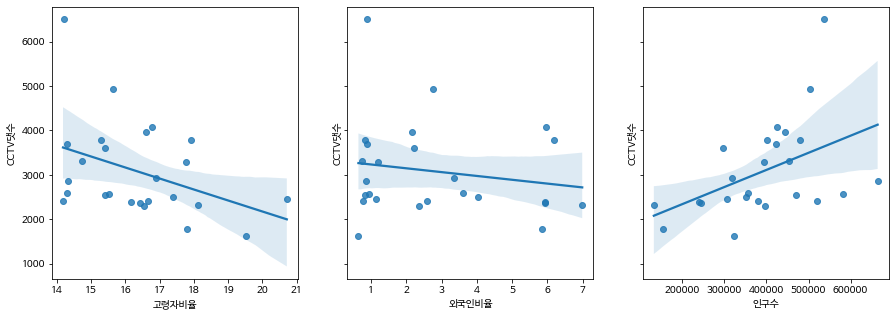

In [ ]:
# 고령자비율, 외국인비율, 인구수와 cctv댓수의 관계 보기
# matplotlib이 아니라 seaborn으로 한다. 이게 더 고급 그래프를 그려줌.

import seaborn as sns

fig, axs = plt.subplots(figsize=(15,5), ncols=3, nrows=1, sharey=True)               # 여러개 그래프를 위해 서브플롯을 만듦. 3열, 1행
features = ['고령자비율','외국인비율','인구수']
for i, feature in enumerate(features):
    # 1.x축 제목 2.y축 제목 3.data 4.순서(번째)
    sns.regplot(x=feature, y='CCTV댓수', data=df, ax=axs[i])            


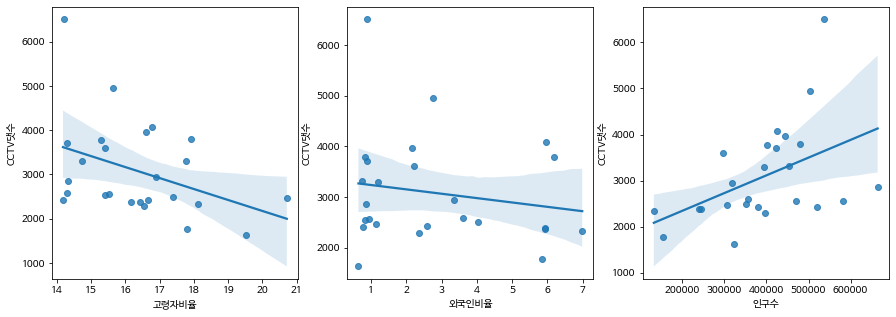

In [ ]:
import seaborn as sns

fig, axs = plt.subplots(figsize=(15,5), ncols=3, nrows=1)               # 여러개 그래프를 위해 서브플롯을 만듦. 3열, 1행
features = ['고령자비율','외국인비율','인구수']

for i, feature in enumerate(features):
    sns.regplot(x=feature, y='CCTV댓수', data=df, ax=axs[i])      

### 5. 그래프 분석
- 구별 cctv 댓수

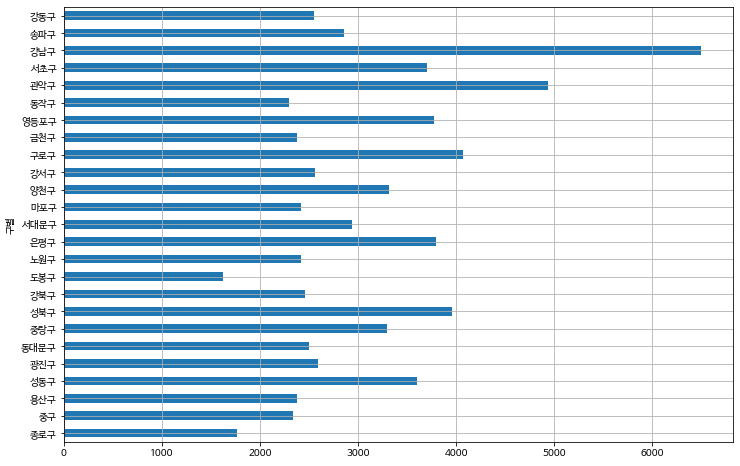

In [ ]:
df['CCTV댓수'].plot(kind='barh', grid = True, figsize = (12,8))     # 이걸로 사이즈 조절 가능하네 개굳
plt.show()

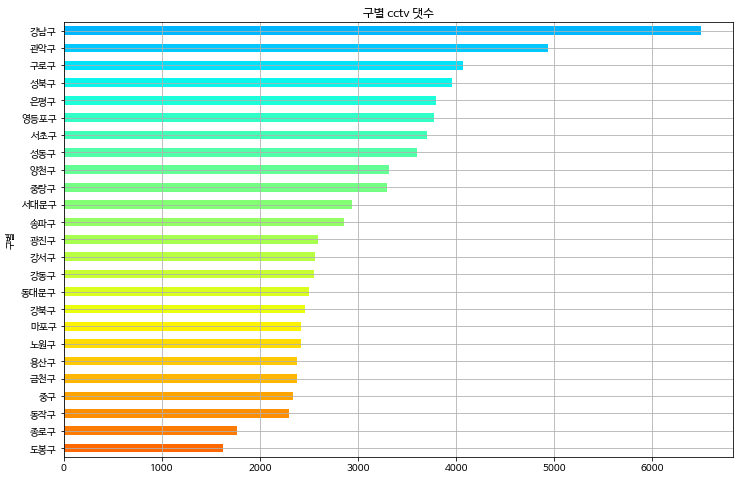

In [ ]:
# sort_values() : 댓수 많은 순으로 정렬
colors = plt.get_cmap('jet')(np.linspace(0.8,0.2,30)) # 0.2, 0.8이 색 범위, 10은 10개

df['CCTV댓수'].sort_values().plot(kind='barh', grid = True, figsize = (12,8), 
                                    title = '구별 cctv 댓수', color=colors)     # 이걸로 사이즈 조절 가능

                                                          
plt.show()

- 인구대비 cctv 비율

In [ ]:
# 'cctv 비율'이라는 항목추가. cctv와 인구수의 비 

df['cctv비율'] = (df.CCTV댓수 / df.인구수 * 100).round(2)
df.head()

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
종로구,1772,20.49,155106,146029,9077,27605,5.85,17.80,1.14
중구,2333,78.98,132259,123016,9243,23980,6.99,18.13,1.76
용산구,2383,78.64,240665,226378,14287,38884,5.94,16.16,0.99
성동구,3602,46.13,295767,289162,6605,45591,2.23,15.41,1.22
광진구,2588,112.29,355306,342481,12825,50815,3.61,14.30,0.73


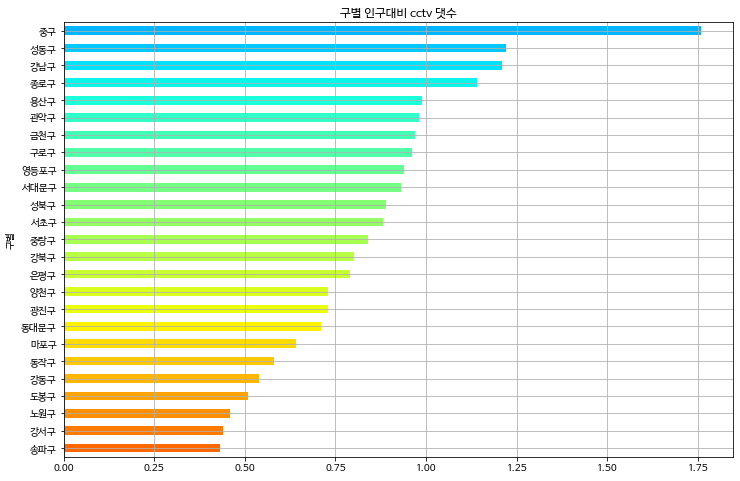

In [ ]:
df['cctv비율'].sort_values().plot(kind='barh', grid = True, figsize = (12,8),
                                title = '구별 인구대비 cctv 댓수', color=colors) 
plt.show()

### 6. 인구수와 cctv 댓수 분석
- 산점도


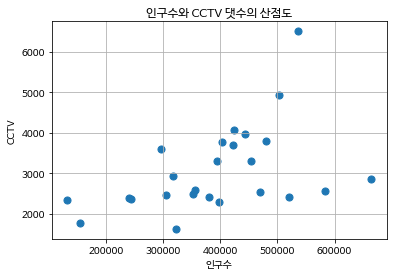

In [ ]:
plt.scatter(df.인구수, df.CCTV댓수, s=50)           # x축이 인구수
plt.grid(True)
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

- 회귀선 그리기(상관관계의 기울기 그리기)

In [ ]:
fp1 = np.polyfit(df.인구수, df.CCTV댓수, 1)             # 1은 함수의 차수
fp1                                                     # 기울기와 절편이 나온다.

array([3.85119765e-03, 1.57231514e+03])

In [ ]:
fx = np.array([100000, 700000])
fy = np.array([100000 * fp1[0] + fp1[1], 700000 * fp1[0] + fp1[1]] )
fy

array([1957.43490106, 4268.1534916 ])

In [ ]:
# 조금 더 세련되게 구하는 방법 : np.poly1d : 기울기와 절편을 주면 1차식을 준다.

f1 = np.poly1d(fp1)
fy = f1(fx)
fy

array([1957.43490106, 4268.1534916 ])

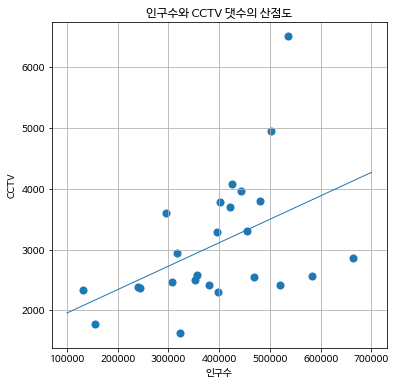

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df.인구수, df.CCTV댓수, s=50)           # x축이 인구수
plt.plot(fx, fy, lw=1)                             # 선 그리기
plt.grid(True)
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

- 오차를 계산하고, 오차의 내림차순으로 소팅된 데이터프레임 만들기

In [ ]:
df['오차'] = np.abs(df['CCTV댓수'] - f1(df['인구수'])).round(2)
df.head()

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
종로구,1772,20.49,155106,146029,9077,27605,5.85,17.80,1.14,397.66
중구,2333,78.98,132259,123016,9243,23980,6.99,18.13,1.76,251.33
용산구,2383,78.64,240665,226378,14287,38884,5.94,16.16,0.99,116.16
성동구,3602,46.13,295767,289162,6605,45591,2.23,15.41,1.22,890.63
광진구,2588,112.29,355306,342481,12825,50815,3.61,14.30,0.73,352.67


In [ ]:
dfs = df.sort_values(by = '오차', ascending=False)
dfs.head(10)

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,6502,61.64,536107,531375,4732,76184,0.88,14.21,1.21,2865.03
관악구,4942,49.91,502698,488800,13898,78647,2.76,15.64,0.98,1433.70
송파구,2854,203.19,664341,658670,5671,95164,0.85,14.32,0.43,1276.82
강서구,2560,78.53,582995,577519,5476,90404,0.94,15.51,0.44,1257.54
도봉구,1629,82.82,322419,320365,2054,62894,0.64,19.51,0.51,1185.01
노원구,2415,66.38,520005,515997,4008,86697,0.77,16.67,0.46,1159.96
성동구,3602,46.13,295767,289162,6605,45591,2.23,15.41,1.22,890.63
구로구,4075,48.83,424582,399266,25316,71186,5.96,16.77,0.96,867.54
강동구,2547,112.25,469094,465209,3885,72275,0.83,15.41,0.54,831.89


- 최종 그림

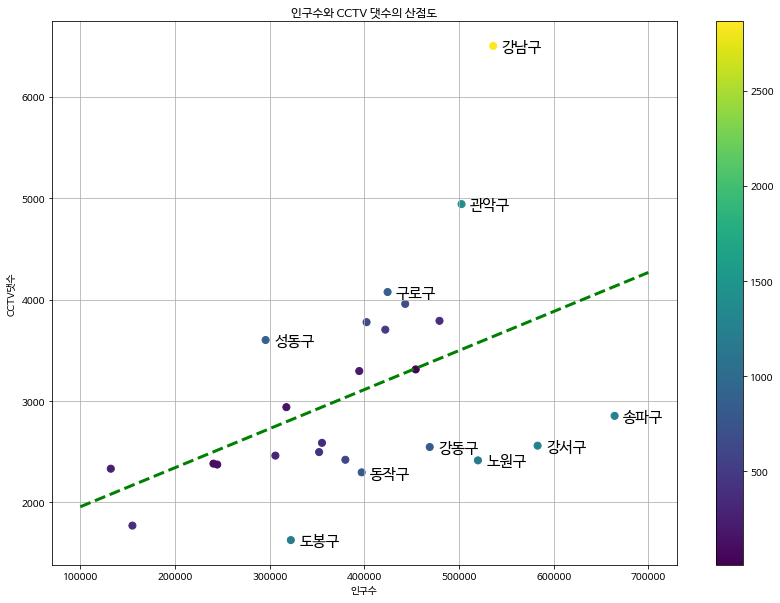

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(df.인구수, df.CCTV댓수, c=df.오차, s=50)            # x축이 인구수, c는 color
plt.plot(fx, fy, 'g--', lw=3)                                   # 선 그리기

for i in range(10):                                             # dfs에서 많이 떨어진거 10개 구하기
    plt.text(dfs.인구수[i]+9000, dfs.CCTV댓수[i]-50, dfs.index[i], fontsize=15)     # 점보다 50 아래에 쓰기


plt.grid(True)
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV댓수')
plt.colorbar()
plt.savefig('CCTV와_인구수_최종결과.png')
# plt.show()              
# plt.savefig('CCTV와_인구수_최종결과.png')

- 작업한 데이터파일 저장

In [ ]:
# 구별이 인덱스인 채로 하면 끄집어 낼 떄 머리가 아플 수 있으므로 리셋해줌

df.reset_index(inplace=True)
df.head()

,구별,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
0,종로구,1772,20.49,155106,146029,9077,27605,5.85,17.80,1.14,397.66
1,중구,2333,78.98,132259,123016,9243,23980,6.99,18.13,1.76,251.33
2,용산구,2383,78.64,240665,226378,14287,38884,5.94,16.16,0.99,116.16
3,성동구,3602,46.13,295767,289162,6605,45591,2.23,15.41,1.22,890.63
4,광진구,2588,112.29,355306,342481,12825,50815,3.61,14.30,0.73,352.67


In [ ]:
df.to_csv('서울시_구별_CCTV와_인구수.csv', index = False)          # csv 작업에는 인덱스 값을 없애주고 저장

전처리 과정은 항상 필요.


2개 이상의 데이터를 섞어서 만들면 더 좋은 데이터

(하나는 부족)


2개를 전처리 하고 합치고 이 결과로 하기
